In [8]:
import os
import tensorflow as tf
import warnings
import numpy as np
import pandas as pd
import scanpy as sc

warnings.simplefilter(action='ignore', category=FutureWarning)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from scgamnn import scGAMNN
from utils import *
from metrics import *
warnings.filterwarnings("ignore")

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100)
sc.settings.set_figure_params(dpi_save=300)
sc.logging.print_version_and_date()

adata1  = sc.read_csv("E:/scGAMNN/data/PBMC/Data1.csv")
adata2 = sc.read_csv("E:/scGAMNN/data/PBMC/Data2.csv")
adata = adata1.concatenate(adata2)
ident1 = pd.read_csv("E:/scGAMNN/data/PBMC/label1.csv")
ident2 = pd.read_csv("E:/scGAMNN/data/PBMC/label2.csv")
idents= np.vstack((ident1,ident2))
adata.obs['celltype'] = idents
match = np.array(pd.read_csv("E:/scGAMNN/data/PBMC/match.csv"))
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.obs["batch"] = np.array([0] * len(ident1) + [1] * len(ident2))
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor='seurat_v3',batch_key='batch')
adata = adata[:,adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
adatas = [adata[adata.obs['batch'] == i,:].copy() for i in [0,1]]
scaledata = adata.X
adj, adj_n = construct_graph(adatas, match)

Running Scanpy 1.9.1, on 2023-07-13 15:23.
normalizing by total count per cell
    finished (0:00:03): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [9]:
model = scGAMNN(scaledata, adj, adj_n, match=match, hidden_dim=120, latent_dim=50, decA="DBL", layer_enc="GCN")

In [10]:
%load_ext memory_profiler
import time
time_s = time.time()
%memit model.train(epochs=200, W_a=1, W_x=1, W_w=0.05)
print('time used:', time.time()-time_s)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Epoch 1  X_rec_loss: 0.32483757   A_rec_loss: 0.30347517   MNN_loss: 0.30347517  total_loss:  0.67827284
Learning rate = 0.0020000
Epoch 2  X_rec_loss: 0.3240498   A_rec_loss: 0.15164116   MNN_loss: 0.15164116  total_loss:  0.52432775
Learning rate = 0.0020000
Epoch 3  X_rec_loss: 0.32362175   A_rec_loss: 0.017099435   MNN_loss: 0.017099435  total_loss:  0.39148837
Learning rate = 0.0020000
Epoch 4  X_rec_loss: 0.32302943   A_rec_loss: 0.0018341017   MNN_loss: 0.0018341017  total_loss:  0.37876055
Learning rate = 0.0020000
Epoch 5  X_rec_loss: 0.32210076   A_rec_loss: 0.0013530836   MNN_loss: 0.0013530836  total_loss:  0.37998256
Learning rate = 0.0020000
Epoch 6  X_rec_loss: 0.32072046   A_rec_loss: 0.001350978   MNN_loss: 0.001350978  total_loss:  0.3806609
Learning rate = 0.0020000
Epoch 7  X_rec_loss: 0.31880784   A_rec_loss: 0.0013510546   MNN_loss: 0.0013510546  total_loss:  0.380215

Epoch 62  X_rec_loss: 0.2898912   A_rec_loss: 0.0018142525   MNN_loss: 0.0018142525  total_loss:  0.30951747
Learning rate = 0.0012800
Epoch 63  X_rec_loss: 0.2896717   A_rec_loss: 0.0017795357   MNN_loss: 0.0017795357  total_loss:  0.30908033
Learning rate = 0.0012800
Epoch 64  X_rec_loss: 0.28947064   A_rec_loss: 0.0017551046   MNN_loss: 0.0017551046  total_loss:  0.3086525
Learning rate = 0.0012800
Epoch 65  X_rec_loss: 0.2893465   A_rec_loss: 0.0017393847   MNN_loss: 0.0017393847  total_loss:  0.30829448
Learning rate = 0.0012800
Epoch 66  X_rec_loss: 0.2891108   A_rec_loss: 0.0017287368   MNN_loss: 0.0017287368  total_loss:  0.30785307
Learning rate = 0.0012800
Epoch 67  X_rec_loss: 0.28893358   A_rec_loss: 0.001723624   MNN_loss: 0.001723624  total_loss:  0.30747163
Learning rate = 0.0012800
Epoch 68  X_rec_loss: 0.288783   A_rec_loss: 0.0017242427   MNN_loss: 0.0017242427  total_loss:  0.30710673
Learning rate = 0.0012800
Epoch 69  X_rec_loss: 0.28857175   A_rec_loss: 0.00172595

Epoch 123  X_rec_loss: 0.28259176   A_rec_loss: 0.0016467908   MNN_loss: 0.0016467908  total_loss:  0.29505485
Learning rate = 0.0008192
Epoch 124  X_rec_loss: 0.2824967   A_rec_loss: 0.0016444311   MNN_loss: 0.0016444311  total_loss:  0.29490235
Learning rate = 0.0006554
Epoch 125  X_rec_loss: 0.28240952   A_rec_loss: 0.0016431259   MNN_loss: 0.0016431259  total_loss:  0.2947477
Learning rate = 0.0006554
Epoch 126  X_rec_loss: 0.28235137   A_rec_loss: 0.0016420594   MNN_loss: 0.0016420594  total_loss:  0.29463658
Learning rate = 0.0006554
Epoch 127  X_rec_loss: 0.28229135   A_rec_loss: 0.0016403734   MNN_loss: 0.0016403734  total_loss:  0.29452989
Learning rate = 0.0006554
Epoch 128  X_rec_loss: 0.28223103   A_rec_loss: 0.001639197   MNN_loss: 0.001639197  total_loss:  0.29441598
Learning rate = 0.0006554
Epoch 129  X_rec_loss: 0.28217757   A_rec_loss: 0.0016381621   MNN_loss: 0.0016381621  total_loss:  0.2943098
Learning rate = 0.0006554
Epoch 130  X_rec_loss: 0.28211614   A_rec_loss

Epoch 184  X_rec_loss: 0.2795062   A_rec_loss: 0.0015773618   MNN_loss: 0.0015773618  total_loss:  0.28960198
Learning rate = 0.0004194
Epoch 185  X_rec_loss: 0.27946705   A_rec_loss: 0.0015764124   MNN_loss: 0.0015764124  total_loss:  0.2895403
Learning rate = 0.0004194
Epoch 186  X_rec_loss: 0.27943888   A_rec_loss: 0.0015754094   MNN_loss: 0.0015754094  total_loss:  0.28948846
Learning rate = 0.0004194
Epoch 187  X_rec_loss: 0.2794054   A_rec_loss: 0.0015751694   MNN_loss: 0.0015751694  total_loss:  0.2894286
Learning rate = 0.0004194
Epoch 188  X_rec_loss: 0.27935702   A_rec_loss: 0.0015737754   MNN_loss: 0.0015737754  total_loss:  0.289359
Learning rate = 0.0004194
Epoch 189  X_rec_loss: 0.27932078   A_rec_loss: 0.0015731286   MNN_loss: 0.0015731286  total_loss:  0.2892976
Learning rate = 0.0004194
Epoch 190  X_rec_loss: 0.2792908   A_rec_loss: 0.0015724411   MNN_loss: 0.0015724411  total_loss:  0.2892432
Learning rate = 0.0004194
Epoch 191  X_rec_loss: 0.27925485   A_rec_loss: 0.

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


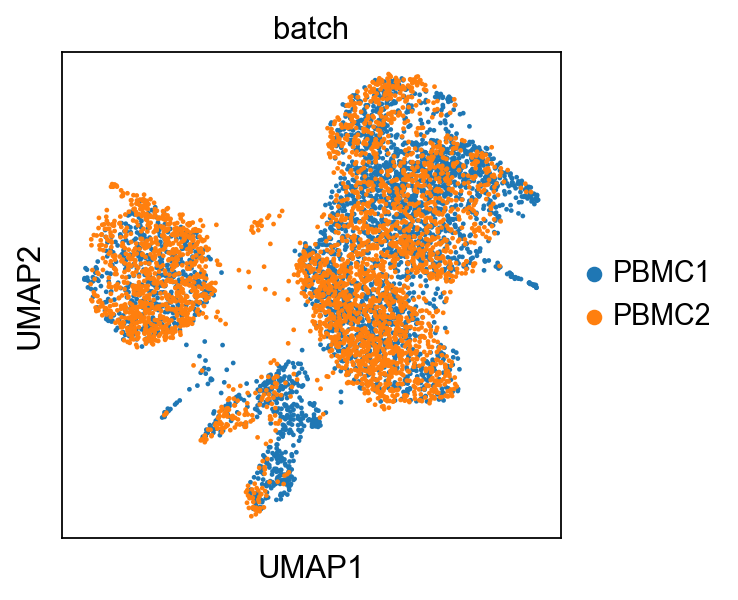

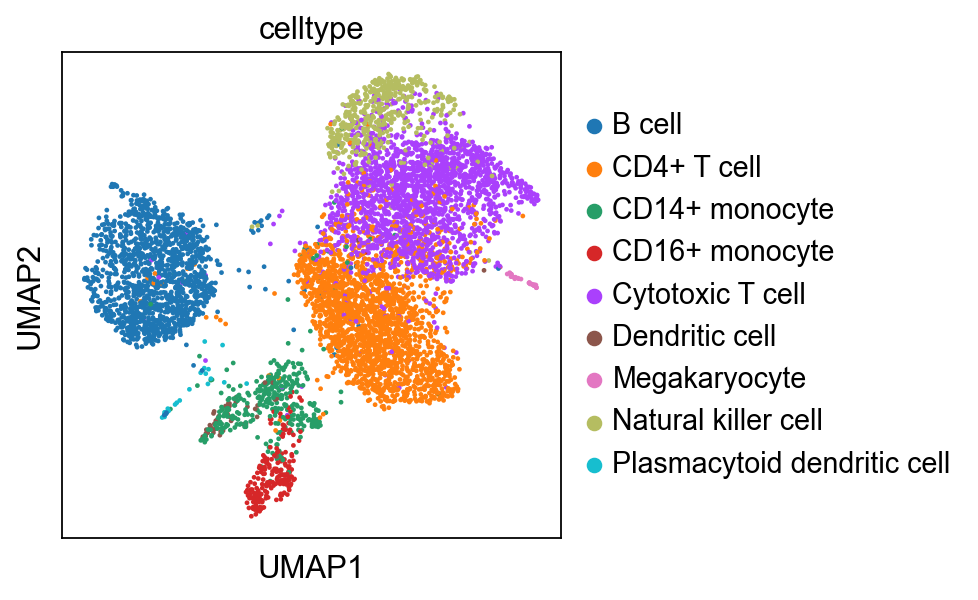

integrate ASW_c: 0.6336 ASW_b: 0.9079 


In [11]:
import anndata as ad
adata_scGAMNN=ad.AnnData(model.embedding(scaledata, adj_n))
sc.pp.neighbors(adata_scGAMNN)
sc.tl.umap(adata_scGAMNN)
adata_scGAMNN.obs['celltype'] = adata.obs['celltype'].to_list()
adata_scGAMNN.obs['batch'] = adata.obs['batch'].to_list()
adata_scGAMNN.obs['batch'] = ['PBMC1' if i == 0 else 'PBMC2' for i in adata_scGAMNN.obs['batch']]
sc.pl.umap(adata_scGAMNN, color='batch')
sc.pl.umap(adata_scGAMNN, color='celltype')

inte_scGAMNN=integrate_indicators (np.array(adata_scGAMNN.obsm['X_umap']),np.array(adata_scGAMNN.obs['batch']),np.array(adata_scGAMNN.obs['celltype']))
inte_scGAMNN_df=pd.DataFrame.from_dict(inte_scGAMNN,orient='index').T

In [14]:
#9-------------------------
sc.tl.leiden(adata_scGAMNN,resolution=0.57)
cluster_scGAMNN=cluster_indicators (adata_scGAMNN.obs['leiden'],np.array(adata_scGAMNN.obs['celltype']))
cluster_scGAMNN_df=pd.DataFrame.from_dict(cluster_scGAMNN,orient='index').T

running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
cluster nmi: 0.7089 ari: 0.6852 


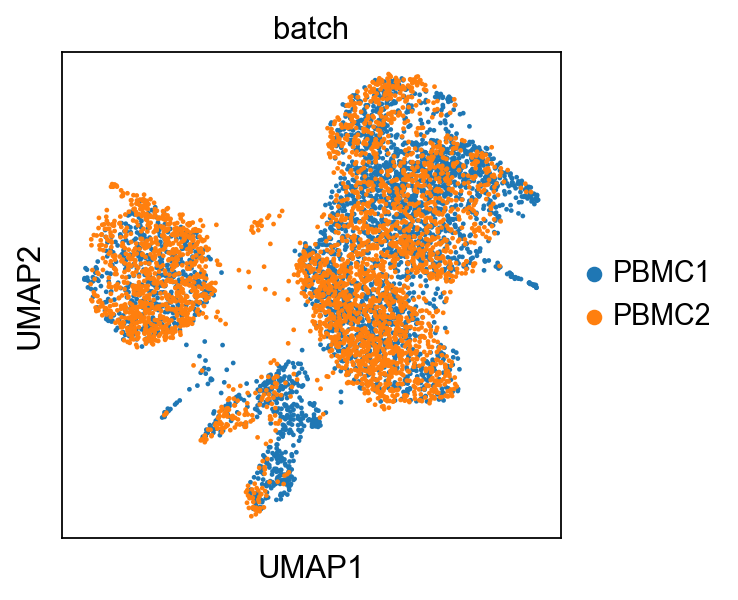

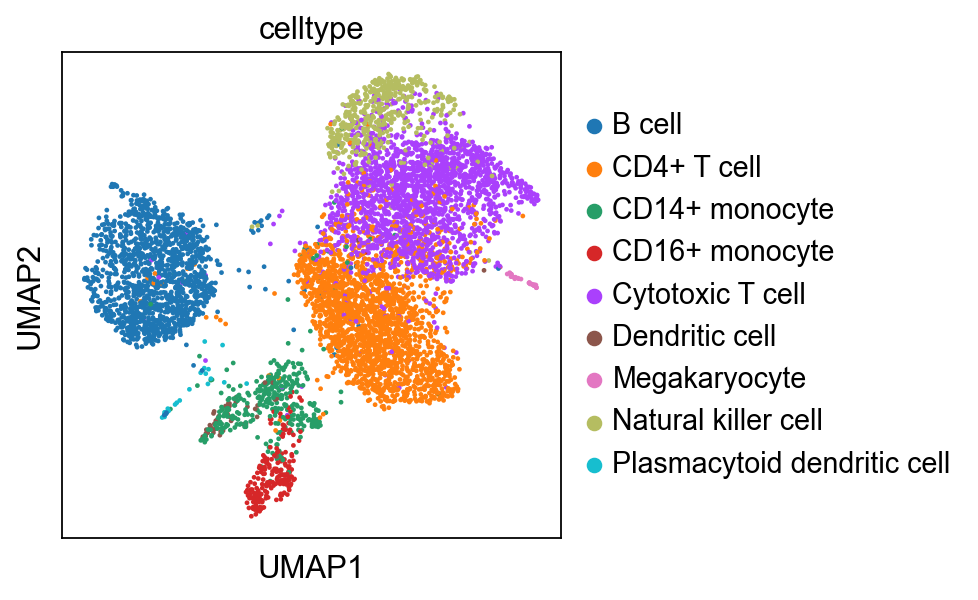

In [15]:
sc.pl.umap(adata_scGAMNN,color='batch',save='_PBMC_scGAMNN_batch.pdf')
sc.pl.umap(adata_scGAMNN,color='celltype',save='_PBMC_scGAMNN_celltype.pdf')

In [16]:
inte_scGAMNN_df.to_csv('result/inte_scGAMNN_PBMC.csv',index=0)
cluster_scGAMNN_df.to_csv('result/c_scGAMNN_PBMC.csv',index=0)

In [17]:
adata_scGAMNN.write('result/adata_scGAMNN_PBMC.h5ad')
#adata_scGAMNN= sc.read_h5ad('result/adata_scGAMNN_PBMC.h5ad')


In [18]:
entropy_scGAMNN=compute_entropy(adata_scGAMNN)
entropy_scGAMNN.to_csv('result/entropy_scGAMNN_PBMC.csv',index=0)

Calculating entropy ...
use exist neighbors
Entropy calculated!
